*Author:*  
**Ella Pournezhad**  
  
*Description:*   
**Correlation calculations has been done in this code.**  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

----------------------------

# Loading Data

In [2]:
file_path1 = "AP data - Final.csv"
file_path2 = "Health data - Final.csv"

**Loading Air pollution data**:

In [3]:
df_ap = pd.read_csv(file_path1, index_col=0)
df_ap['Date'] = pd.to_datetime(df_ap['Date'], format='%Y-%m-%d')
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 103
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             104 non-null    datetime64[ns]
 1   Ozone_mean                                       103 non-null    float64       
 2   Ozone_min                                        103 non-null    float64       
 3   Ozone_max                                        103 non-null    float64       
 4   Nitric oxide_mean                                104 non-null    float64       
 5   Nitric oxide_min                                 104 non-null    float64       
 6   Nitric oxide_max                                 104 non-null    float64       
 7   Nitrogen dioxide_mean                            104 non-null    float64       
 8   Nitrogen dioxide_min                         

In [4]:
df_ap

,Date,Ozone_mean,Ozone_min,Ozone_max,Nitric oxide_mean,Nitric oxide_min,Nitric oxide_max,Nitrogen dioxide_mean,Nitrogen dioxide_min,Nitrogen dioxide_max,...,Volatile PM2.5 (Hourly measured)_max,Modelled Wind Direction_mean,Modelled Wind Direction_min,Modelled Wind Direction_max,Modelled Wind Speed_mean,Modelled Wind Speed_min,Modelled Wind Speed_max,Modelled Temperature_mean,Modelled Temperature_min,Modelled Temperature_max
0,2015-06-01,57.600437,0.44903,96.69167,2.881438,0.23408,49.08874,14.341146,2.59208,53.90238,...,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-01,54.258891,1.29721,132.86373,3.758570,0.33303,31.60970,18.609667,3.29428,65.20908,...,14.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-01,45.790808,0.04989,117.44695,4.971742,0.27940,83.18275,19.439237,2.37724,67.51444,...,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-09-01,38.842182,0.34925,113.15619,7.644233,0.25039,160.00021,23.763397,2.11857,76.36039,...,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-01,37.442629,1.04774,92.15145,10.643539,0.21412,195.30379,26.937149,3.62546,76.13376,...,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-09-01,49.326983,0.29936,92.80005,5.902583,0.00000,137.97762,13.753142,0.37835,57.65769,...,NaN,240.257104,2.7,356.9,4.091530,0.1,10.4,15.172268,8.1,24.1
100,2023-10-01,51.707487,1.26394,149.12868,8.566071,0.00000,187.28039,22.713426,0.15162,84.56053,...,NaN,180.489784,0.5,355.9,3.947482,0.2,11.0,15.610791,6.8,26.7
101,2023-11-01,39.759727,1.29721,88.16005,11.096945,0.06547,129.38851,22.749615,1.75219,64.05096,...,NaN,194.141272,0.7,359.3,4.681326,0.2,12.7,11.571313,3.1,21.0
102,2023-12-01,42.407416,0.79828,81.87359,16.830495,0.09991,218.24185,23.792764,0.26643,76.18815,...,NaN,224.572500,0.1,359.5,5.519306,0.0,15.7,7.421111,-1.8,13.6


**Loading Health Data:**

In [5]:
df_health = pd.read_csv(file_path2)
df_health['Date'] = pd.to_datetime(df_health['Date'], format='%Y-%m-%d')
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        104 non-null    datetime64[ns]
 1   Total Emergency Admissions  104 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [6]:
df_health

,Date,Total Emergency Admissions
0,2015-06-01,6850
1,2015-07-01,6960
2,2015-08-01,6623
3,2015-09-01,6868
4,2015-10-01,7043
...,...,...
99,2023-09-01,10794
100,2023-10-01,11465
101,2023-11-01,11548
102,2023-12-01,11294


---------------------------------

# Pre-processing

### Defining functions:

In [7]:
def generate_column_list (columns,measurement):
    column_list = [col + '_' + measurement for col in columns]
    return column_list

In [8]:
def columns_containing_substr(df, substrings):
    matching_columns = []
    for col in df.columns:
        for substring in substrings:
            if substring in col:
                matching_columns.append(col)
                break  # Once found, no need to continue checking substrings
    return matching_columns

In [9]:
def plot_measurements(measurements, ylabel):
    plt.figure(figsize=(12, 6))
    for col in measurements:
        plt.plot(merged_df['Date'], merged_df[col], label=col)
    plt.title(f"Visualization of Pollutants of {ylabel} Category During period 2015-2024:")
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')
    plt.xlabel('Date')
    plt.savefig(f'images/EDA_{ylabel}_plot.png')
    plt.show()

### Pre-process dataframe:

In [10]:
# Merging datasets on Date
merged_df = pd.merge(df_ap, df_health, on="Date")

In [11]:
# Defining list of pollutant columns and wind columns and all columns
all_columns = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)',
                  'Sulphur dioxide', 'Carbon monoxide',
                 'Modelled Wind Direction', 'Modelled Wind Speed',
                 'Modelled Temperature']

pollutants = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'Sulphur dioxide', 'Carbon monoxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)'] #12

nitrogen_pollutants = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']

pm_pollutants = ['PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)']

other_pollutants = ['Ozone'] #'Sulphur dioxide','Carbon monoxide' removed due to being unavailable

weathers = ['Modelled Wind Speed', 'Modelled Temperature'] #'Modelled Wind Direction' removed 

In [12]:
# Calculate max of max values for each pollutant category
merged_df['PM_max_of_max'] = merged_df[generate_column_list(pm_pollutants,'max')].max(axis=1)
merged_df['Nitrogen_max_of_max'] = merged_df[generate_column_list(nitrogen_pollutants,'max')].max(axis=1)

# Calculate mean of max values for each pollutant category
merged_df['PM_mean_of_max'] = merged_df[generate_column_list(pm_pollutants,'max')].mean(axis=1)
merged_df['Nitrogen_mean_of_max'] = merged_df[generate_column_list(nitrogen_pollutants,'max')].mean(axis=1)

# Calculate max of means for each pollutant category
merged_df['PM_max_of_mean'] = merged_df[generate_column_list(pm_pollutants,'mean')].max(axis=1)
merged_df['Nitrogen_max_of_mean'] = merged_df[generate_column_list(nitrogen_pollutants,'mean')].max(axis=1)

# Calculate mean of means for each pollutant category
merged_df['PM_mean_of_mean'] = merged_df[generate_column_list(pm_pollutants,'mean')].mean(axis=1)
merged_df['Nitrogen_mean_of_mean'] = merged_df[generate_column_list(nitrogen_pollutants,'mean')].mean(axis=1)


--------------------------------

# Calculating Correlations

In the following steps, the measurment using for each pollutant will be monthly mean value:

In [13]:
measurement = 'mean'

In [14]:
all_columns_measurement          = generate_column_list(all_columns,measurement)
pollutants_measurement           = generate_column_list(pollutants,measurement)
nitrogen_pollutants_measurement  = generate_column_list(nitrogen_pollutants,measurement)
pm_pollutants_measurement        = generate_column_list(pm_pollutants,measurement)
other_pollutants_measurement     = generate_column_list(other_pollutants,measurement)
weather_measurement              = generate_column_list(weathers,measurement)

In [15]:
# Defining Categories
categories = {'Nitrogens': nitrogen_pollutants_measurement,
              'PMs': pm_pollutants_measurement,
              'Other pollutants': other_pollutants_measurement,
              'Weather': weather_measurement
             }

-----------------------------

## 0.Overview

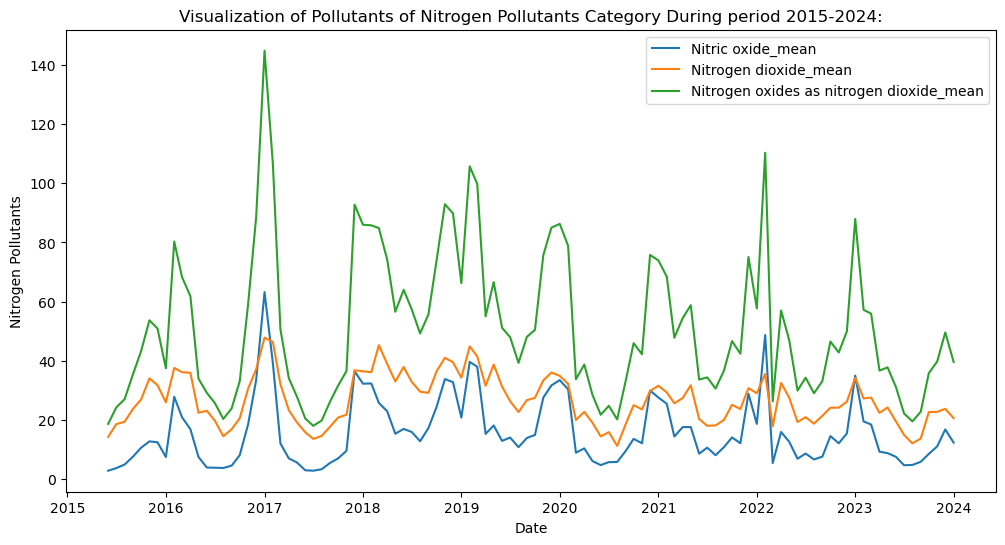

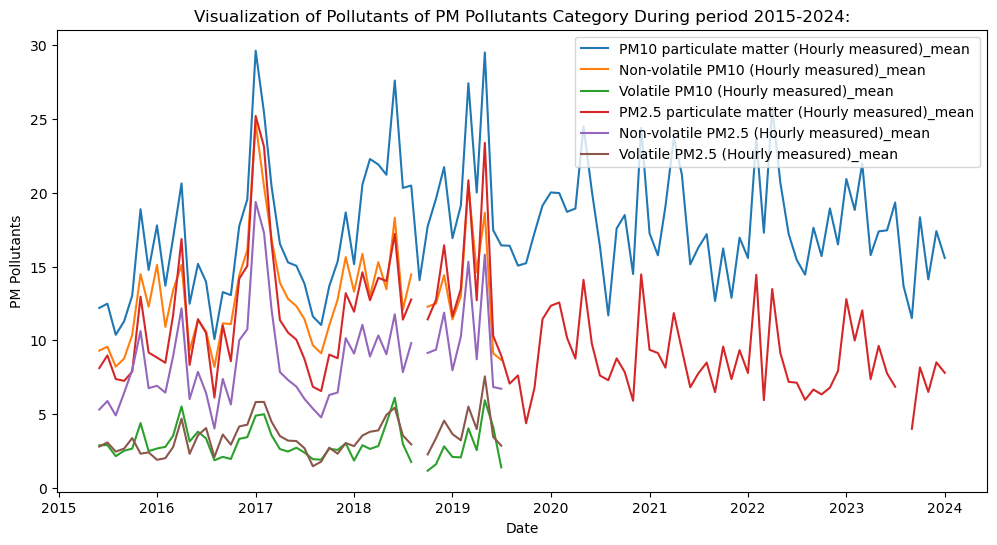

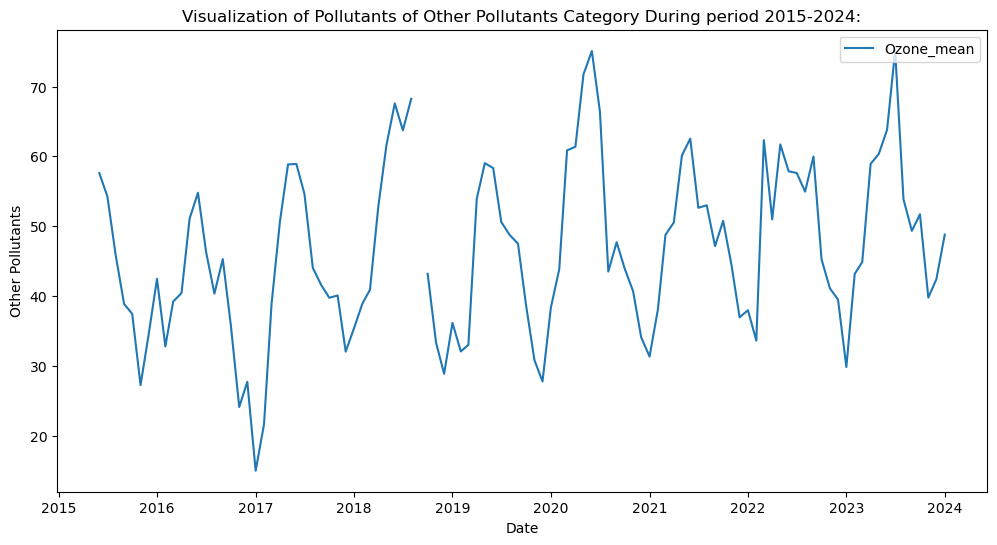

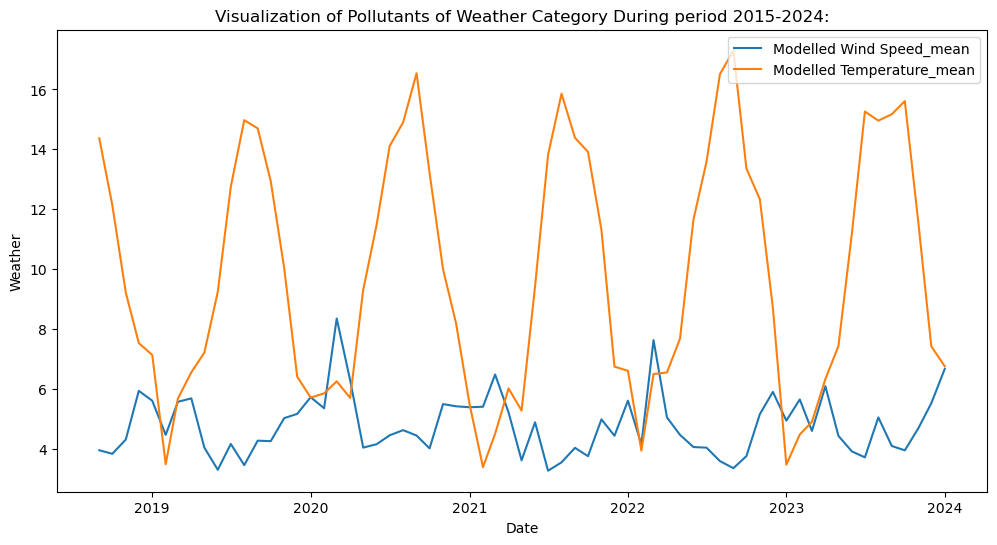

In [16]:
plot_measurements(nitrogen_pollutants_measurement, 'Nitrogen Pollutants')
plot_measurements(pm_pollutants_measurement, 'PM Pollutants')
plot_measurements(other_pollutants_measurement, 'Other Pollutants')
plot_measurements(weather_measurement, 'Weather')

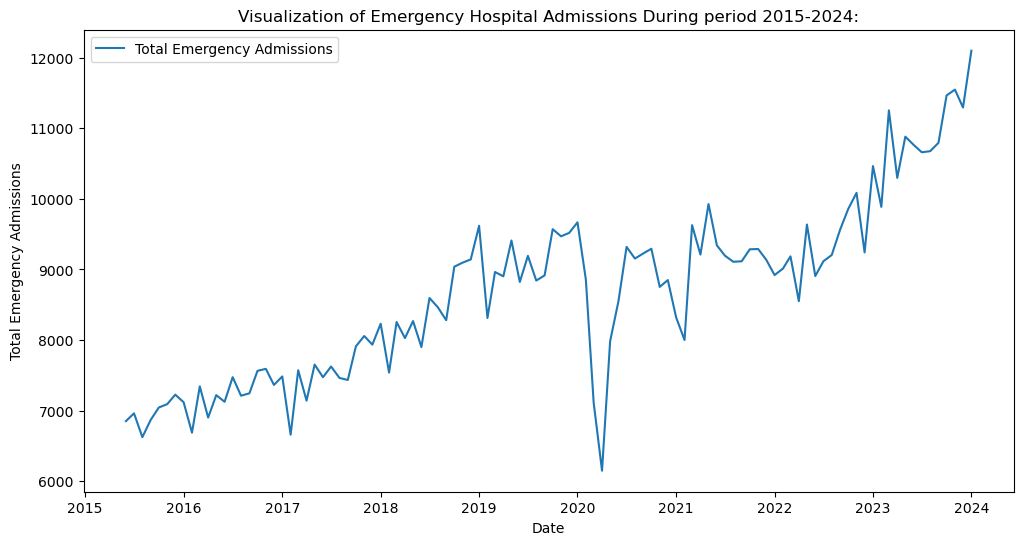

In [17]:
# Plotting Total Emergency Admissions
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'],merged_df['Total Emergency Admissions'], label='Total Emergency Admissions')

plt.title("Visualization of Emergency Hospital Admissions During period 2015-2024:")
plt.ylabel('Total Emergency Admissions')
plt.xlabel('Date')
plt.savefig('images/EDA_Emergency Admissions_plot.png')
plt.legend()
plt.show()

## 1.Calculate correlation of each pollutant with wind conditions:

Calculating correlation between air pollution and wind conditions, doesn't directly answers the project question. But, it gives us insights into the impact of wind variables on different types of pollutants. Proximity of numbers in each category of pollutants, is another confirmation on the approaches with categorizing the pollutants.

In [18]:
pollution_wind_correlations = {}
pollution_wind_correlations = merged_df[weather_measurement + pollutants_measurement].corr()

# Create a DataFrame for correlations
pollution_wind_correlations_df = pd.DataFrame(pollution_wind_correlations, columns=weather_measurement, index=pollutants_measurement)

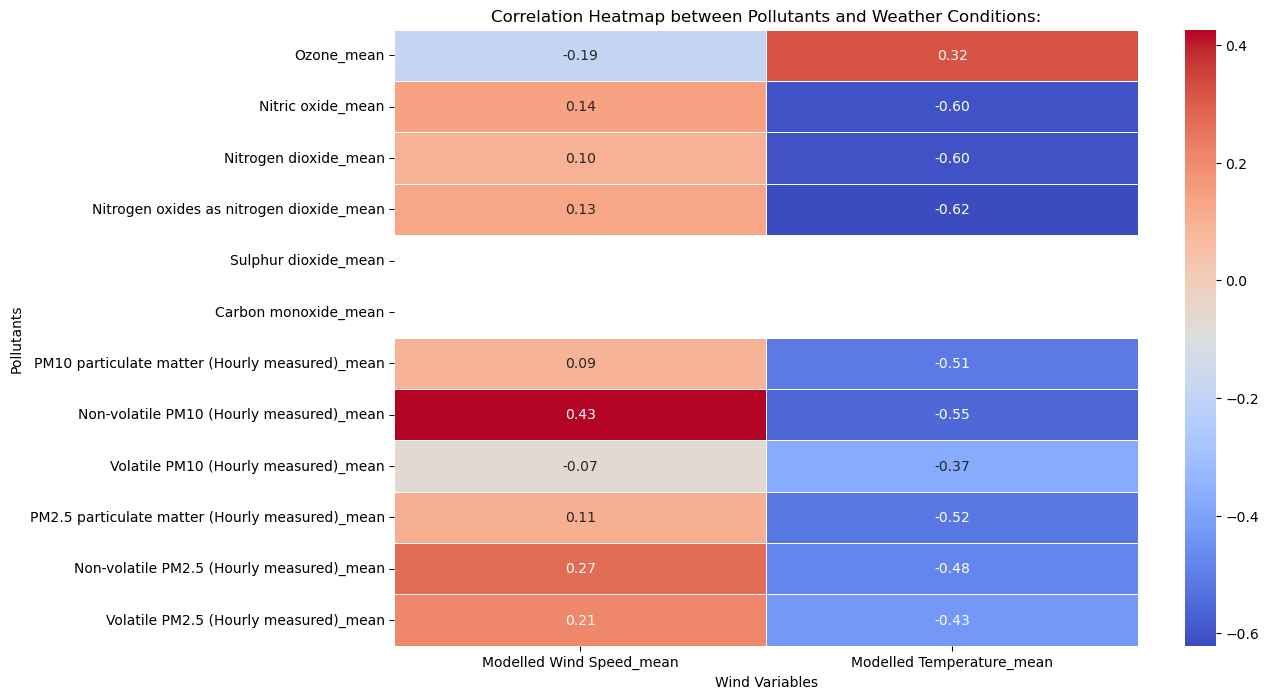

In [19]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pollution_wind_correlations_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Pollutants and Weather Conditions:')
plt.xlabel('Wind Variables')
plt.ylabel('Pollutants')
plt.savefig('images/Correlation_Pollutants_Weather_plot.png', bbox_inches='tight')
plt.show()

## 2.Calculate correlation of each pollution with total Emergency admissions

The first and basic approach to answer the project question, is to calculate and create a simple correlation matrice for each pollutant with total emergency admissions. Although this approach is neither the most accurate nor the best, it gives us valuable basic insights into the impacts of each pollutant on the total emergency admissions, and starting the analysis.

In [20]:
correlations = {}
for pollutant in pollutants_measurement:
    correlation = merged_df['Total Emergency Admissions'].corr(merged_df[pollutant])
    correlations[pollutant] = correlation

# Create a DataFrame for correlations
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

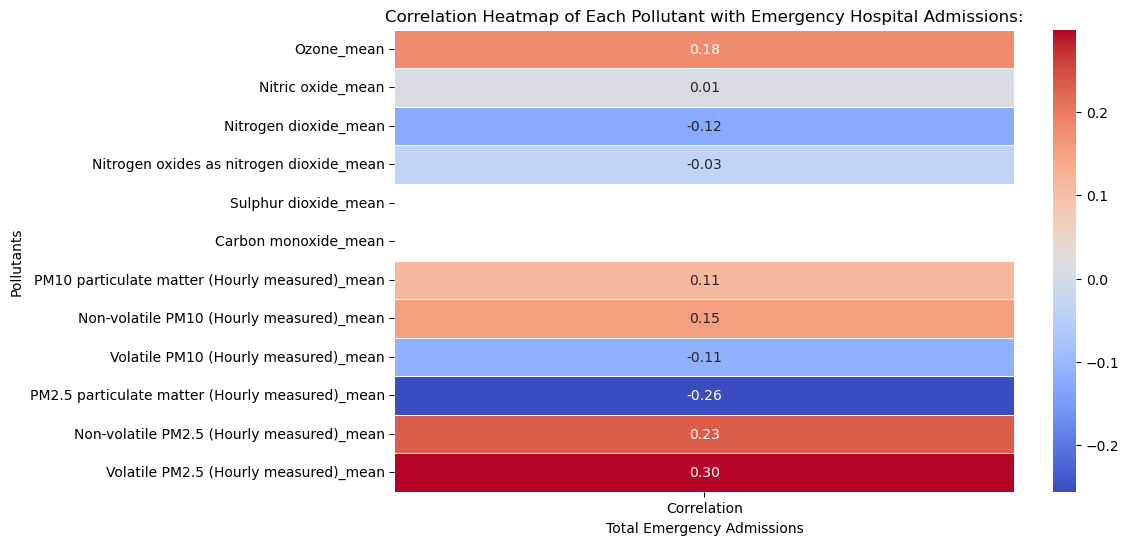

In [21]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Each Pollutant with Emergency Hospital Admissions:')
plt.xlabel('Total Emergency Admissions')
plt.ylabel('Pollutants')
plt.savefig('images/Correlation_Pollutants_EHA_plot.png', bbox_inches='tight')
plt.show()

## 3.Predicting total Emergency admissions based on each Pollutant category:

**What we are going to do in this approach?**  
We are going to predict Total Emergency Admissions numbers based on each category of pollutant and compare it to the actual number of Total Emergency Admissions.  
  
**How does this approach helps us to answer the question "Does air pollution have correlation with Hospital Emergency admissions"?**  
By comparing the predicted emergency admissions with the actual numbers for each pollutant category, we can assess the impact of air pollution on hospital emergency admissions. Here's how the analysis can help answer the project question:  

1. **Visualization**: Visualizing the actual and predicted emergency admissions for each pollutant category can provide insights into the trends and patterns over time. Plotting these data together allows for a visual comparison and interpretation of the model's performance in capturing the variations in emergency admissions related to air pollution.

2. **Correlation Analysis**: We can calculate the correlation coefficients between the actual emergency admissions and the predicted admissions for each pollutant category using methods like Pearson correlation coefficient. A higher correlation coefficient indicates a stronger relationship between air pollution and emergency admissions for that specific pollutant category.

3. **Comparison of Error Metrics**: By comparing the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score for each pollutant category between different approaches (e.g., SimpleImputer and HistGradientBoostingRegressor), we can evaluate the accuracy of the predictions. Lower errors and higher R2 scores indicate better predictive performance, suggesting a stronger correlation between air pollution and emergency admissions.

Overall, by systematically analyzing and comparing the predicted emergency admissions based on different pollutant categories with the actual numbers, along with considering error metrics and correlation coefficients, we can assess the extent to which air pollution correlates with hospital emergency admissions. This analysis provides valuable insights into the relationship between air pollution and public health outcomes, contributing to the understanding of the impact of environmental factors on healthcare needs.

### Model fitting for pollutant categories:

#### Handling NaN values in data  
  
**1. Imputation:** Impute missing values using methods like mean imputation, median imputation, or KNN imputation before fitting the model.  
  
**2. Dropping missing values:** Drop rows with missing values using the dropna() method.  
  
**3. Using models that handle missing values:** Switch to models that can handle missing values inherently, such as HistGradientBoostingRegressor from scikit-learn.  
  
  -------------------------
  
Droping rows with missing values can cause a huge data loss, as not all air pollutions sensors were available in whole time period. So this leads us to reject this approach and continue fitting models with the other approaches for handling missing values.

#### Using Imputation:

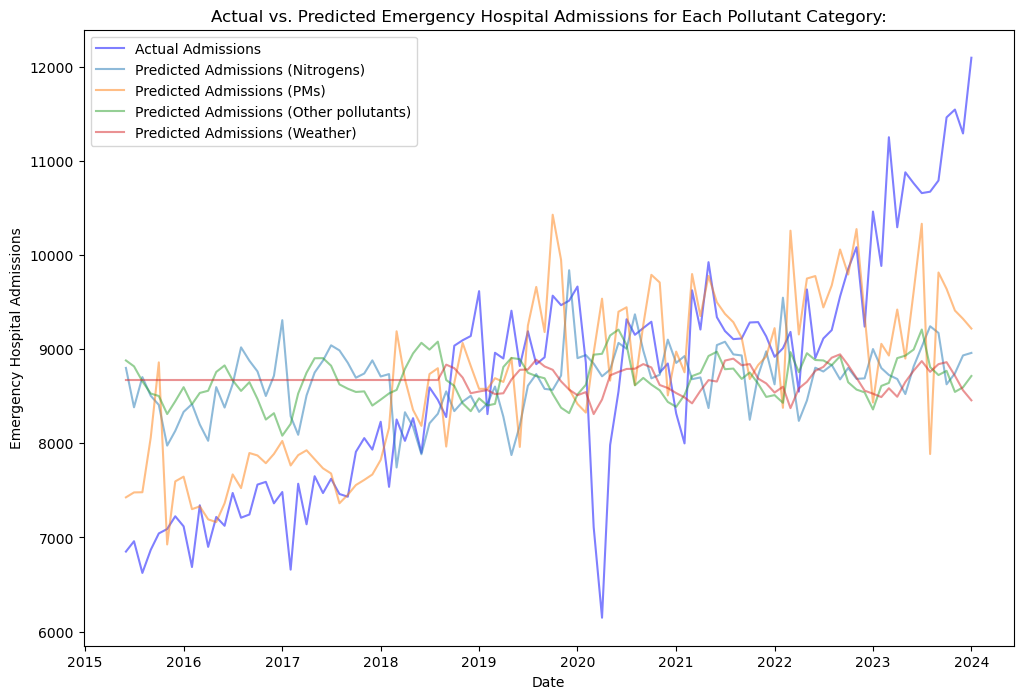

In [22]:
category_models = {}
category_predictions = {}
imputer = SimpleImputer(strategy='mean')

# Accumulate predictions for each category
all_predicted_admissions = pd.DataFrame(index=merged_df.index, columns=categories.keys())

for category, pollutants in categories.items():
    X = merged_df[pollutants]
    y = merged_df['Total Emergency Admissions']

    # Fit a regression model for each pollutant category
    imputer.fit(X)
    X_imputed = pd.DataFrame(imputer.transform(X), columns=pollutants)
    model = LinearRegression()
    model.fit(X_imputed, y)
    category_models[category] = model

    # Predict admissions
    predicted_admissions = model.predict(X_imputed)
    all_predicted_admissions[category] = predicted_admissions
    
    # Calculate correlation
    correlation = pd.Series(predicted_admissions).corr(merged_df['Total Emergency Admissions'])
    category_predictions[category] = correlation

# Plot
plt.figure(figsize=(12, 8)) 
plt.plot(merged_df['Date'], merged_df['Total Emergency Admissions'], label='Actual Admissions', color='blue', alpha=0.5)

for category in categories.keys():
    plt.plot(merged_df['Date'], all_predicted_admissions[category], label=f'Predicted Admissions ({category})', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Emergency Hospital Admissions')
plt.title('Actual vs. Predicted Emergency Hospital Admissions for Each Pollutant Category:')
plt.savefig('images/Prediction_Imputation_plot.png')
plt.legend()
plt.show()

#### Using HistGradientBoostingRegressor:

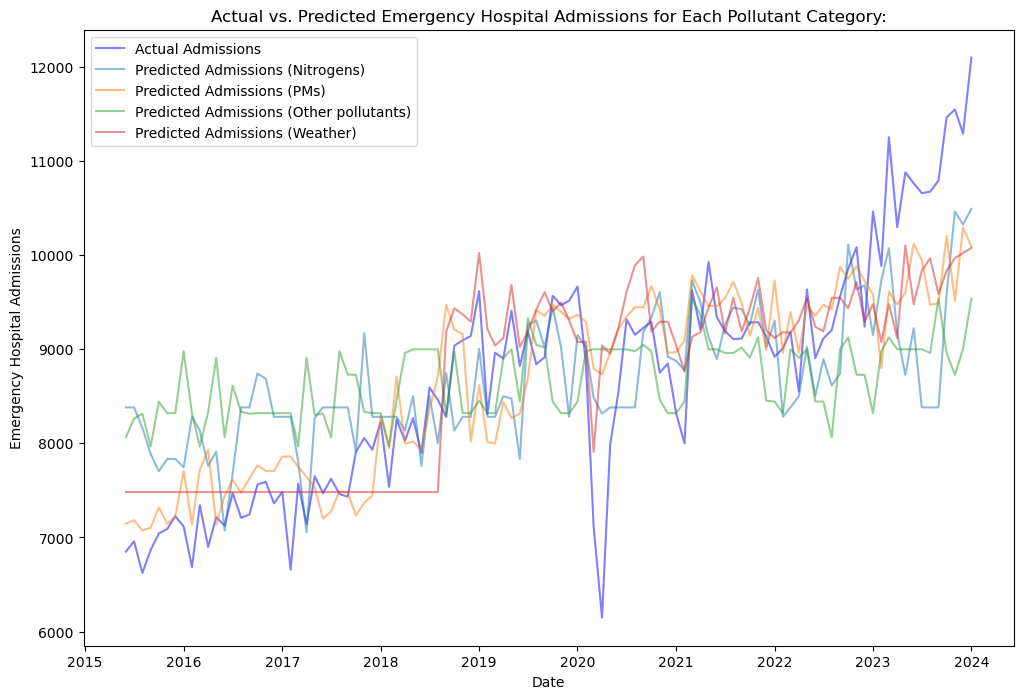

In [23]:
category_models = {}
category_predictions = {}

for category, pollutants in categories.items():
    X = merged_df[pollutants]
    y = merged_df['Total Emergency Admissions']

    # Fit a regression model for each pollutant category
    model = HistGradientBoostingRegressor()
    model.fit(X, y)
    category_models[category] = model

    # Predict admissions
    predicted_admissions = model.predict(X)
    correlation = pd.Series(predicted_admissions).corr(merged_df['Total Emergency Admissions'])
    category_predictions[category] = correlation

# Plot
plt.figure(figsize=(12, 8)) 
plt.plot(merged_df['Date'], merged_df['Total Emergency Admissions'], label='Actual Admissions', color='blue', alpha=0.5)

for category in categories.keys():
    predicted_admissions = category_models[category].predict(merged_df[categories[category]])
    plt.plot(merged_df['Date'], predicted_admissions, label=f'Predicted Admissions ({category})', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Emergency Hospital Admissions')
plt.title('Actual vs. Predicted Emergency Hospital Admissions for Each Pollutant Category:')
plt.savefig('images/Prediction_HistGradient_plot.png')
plt.legend()
plt.show()


### Predicted models Correlation Analysis:

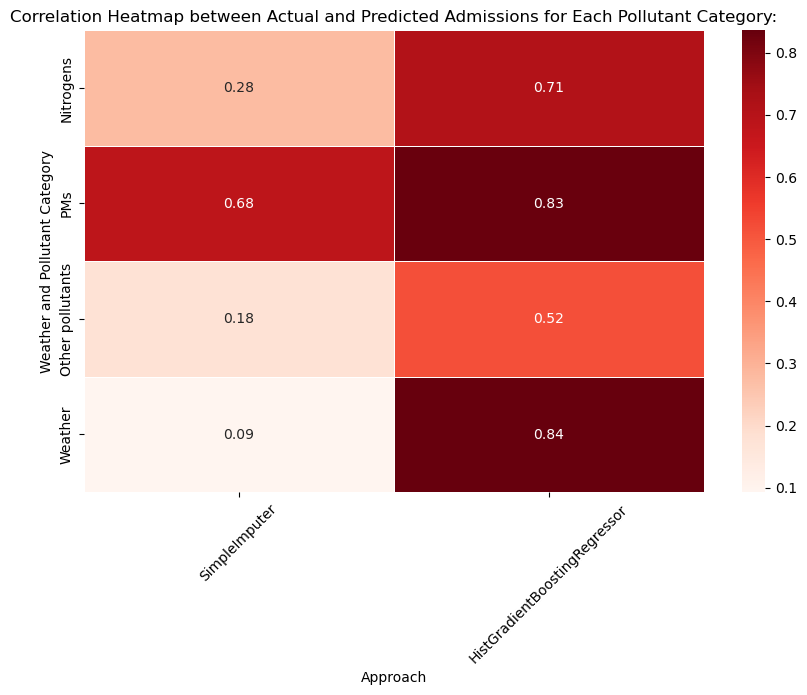

In [24]:
# Calculate correlation coefficients between actual and predicted admissions for each pollutant category
correlation_simple = {}
correlation_hgb = {}

for category in categories.keys():
    # For SimpleImputer approach
    predicted_admissions_simple = all_predicted_admissions[category]
    correlation_simple[category] = pd.Series(predicted_admissions_simple).corr(merged_df['Total Emergency Admissions'])

    # For HistGradientBoostingRegressor approach
    predicted_admissions_hgb = category_models[category].predict(merged_df[categories[category]])
    correlation_hgb[category] = pd.Series(predicted_admissions_hgb).corr(merged_df['Total Emergency Admissions'])

# Convert correlation coefficients to a DataFrame for easier plotting
correlation_data = pd.DataFrame({'SimpleImputer': correlation_simple, 'HistGradientBoostingRegressor': correlation_hgb})

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='Reds', linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap between Actual and Predicted Admissions for Each Pollutant Category:')
plt.xlabel('Approach')
plt.ylabel('Weather and Pollutant Category')
plt.xticks(rotation=45)
plt.savefig('images/Correlation_Prediction_plot.png', bbox_inches='tight')
plt.show()

### Calculating and comparison of the error metrics:

In [25]:
# Calculate metrics for SimpleImputer approach
mae_simple_category = {}
mse_simple_category = {}
r2_simple_category = {}

for category in categories.keys():
    predicted_admissions_simple = all_predicted_admissions[category]
    mae_simple_category[category] = mean_absolute_error(merged_df['Total Emergency Admissions'], predicted_admissions_simple)
    mse_simple_category[category] = mean_squared_error(merged_df['Total Emergency Admissions'], predicted_admissions_simple)
    r2_simple_category[category] = r2_score(merged_df['Total Emergency Admissions'], predicted_admissions_simple)

# Calculate metrics for HistGradientBoostingRegressor approach
mae_hgb_category = {}
mse_hgb_category = {}
r2_hgb_category = {}

for category in categories.keys():
    predicted_admissions_hgb = category_models[category].predict(merged_df[categories[category]])
    mae_hgb_category[category] = mean_absolute_error(merged_df['Total Emergency Admissions'], predicted_admissions_hgb)
    mse_hgb_category[category] = mean_squared_error(merged_df['Total Emergency Admissions'], predicted_admissions_hgb)
    r2_hgb_category[category] = r2_score(merged_df['Total Emergency Admissions'], predicted_admissions_hgb)

# Print metrics for each category in both approaches
print("Metrics for SimpleImputer Approach:")
for category in categories.keys():
    print(f"Category: {category}")
    print(f"MAE: {mae_simple_category[category]}")
    print(f"MSE: {mse_simple_category[category]}")
    print(f"R2: {r2_simple_category[category]}")
    print()

print("Metrics for HistGradientBoostingRegressor Approach:")
for category in categories.keys():
    print(f"Category: {category}")
    print(f"MAE: {mae_hgb_category[category]}")
    print(f"MSE: {mse_hgb_category[category]}")
    print(f"R2: {r2_hgb_category[category]}")
    print()


Metrics for SimpleImputer Approach:
Category: Nitrogens
MAE: 988.9102837674844
MSE: 1468699.8912541205
R2: 0.0763194713384393

Category: PMs
MAE: 645.1426501504344
MSE: 845239.0379525489
R2: 0.4684204403700646

Category: Other pollutants
MAE: 1015.3936817464821
MSE: 1538991.3936527423
R2: 0.03211241958974376

Category: Weather
MAE: 1022.6988752665341
MSE: 1576306.0841328474
R2: 0.008644825403381629

Metrics for HistGradientBoostingRegressor Approach:
Category: Nitrogens
MAE: 717.7851780645237
MSE: 838652.930171196
R2: 0.47256251156754214

Category: PMs
MAE: 518.9803440561483
MSE: 500369.62388529
R2: 0.6853123762936384

Category: Other pollutants
MAE: 887.2375987148886
MSE: 1235448.057235386
R2: 0.22301395851085315

Category: Weather
MAE: 509.77799765976647
MSE: 486435.7090715541
R2: 0.6940755592135245



## 4.Peak Analysis:

nitrogen_pollutants_measurement = columns_containing_substr(merged_df, ['Nitrogen_'])
pm_pollutants_measurement = columns_containing_substr(merged_df, ['PM_'])
weather_measurement = columns_containing_substr(merged_df, ['Temperature'])

# Defining Categories
categories = {'Nitrogens': nitrogen_pollutants_measurement,
              'PMs': pm_pollutants_measurement,
              'Weather': weather_measurement
             }

----------------------

plot_measurements(nitrogen_pollutants_measurement, 'Nitrogen Pollutants')
plot_measurements(pm_pollutants_measurement, 'PM Pollutants')
plot_measurements(weather_measurement, 'Weather')

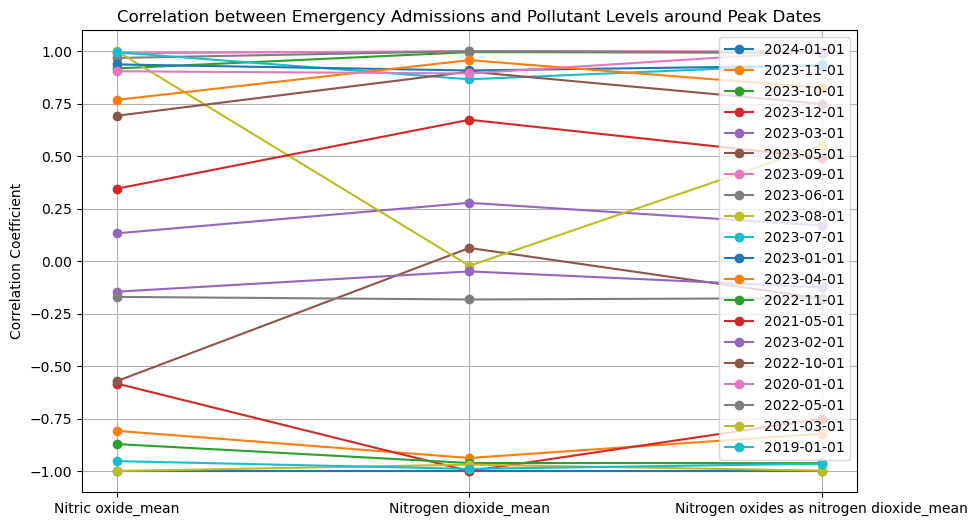

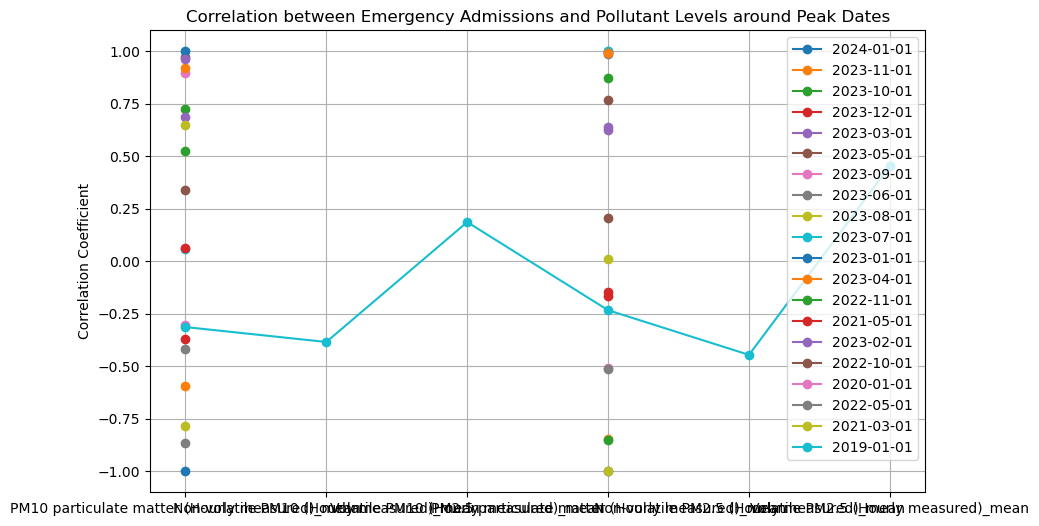

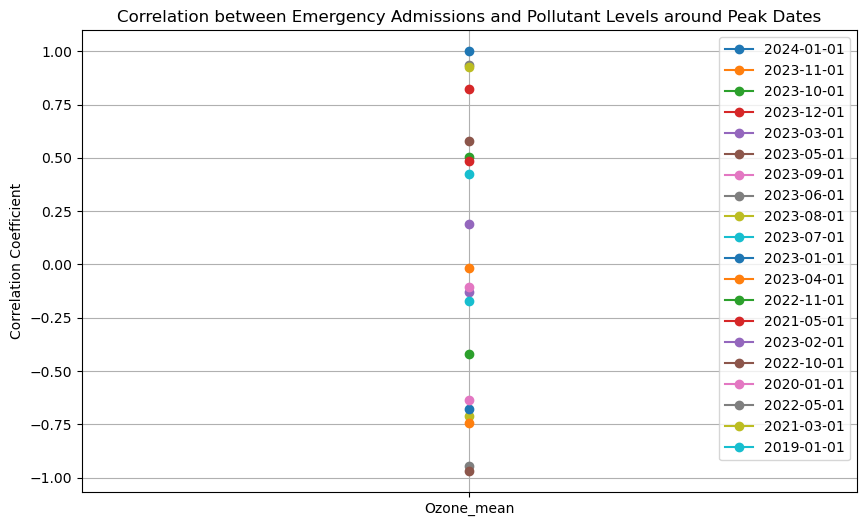

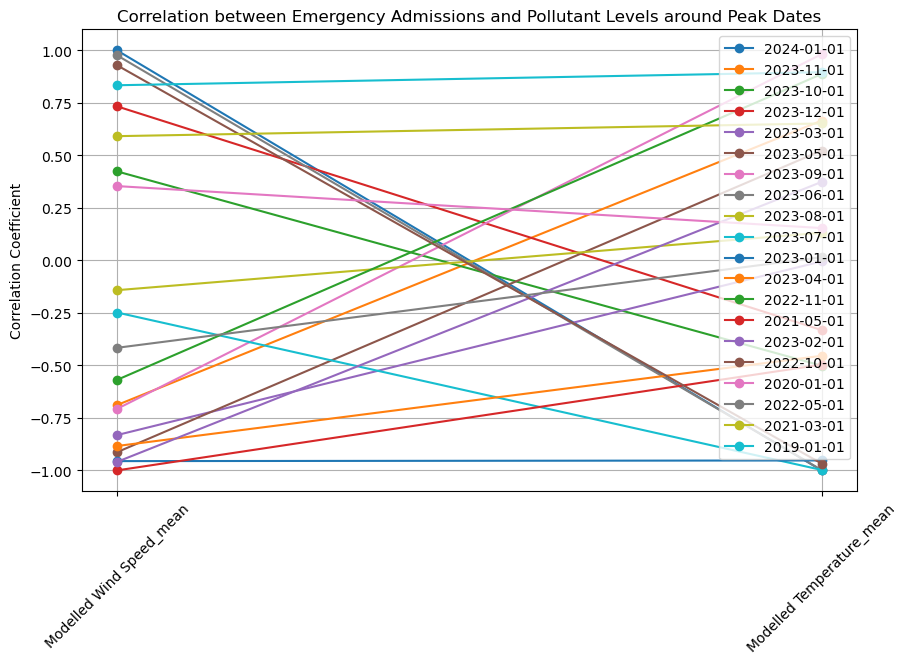

In [26]:
# Step 1: Identify Peak Dates
peak_dates = merged_df.nlargest(20, 'Total Emergency Admissions')['Date']  # Assuming top 5 peak dates

# Step 2: Gather Weather and Pollution Data Around Peak Dates
time_window_months = 1  # Time window before and after peak date
peak_data = []
for date in peak_dates:
    start_date = date - pd.DateOffset(months=time_window_months)
    end_date = date + pd.DateOffset(months=time_window_months)
    peak_window_data = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]
    peak_data.append(peak_window_data)

# Step 3: Correlation Analysis
correlation_results = {}
for category, pollutant in categories.items():
    for i, data in enumerate(peak_data):
        correlation_results[peak_dates.iloc[i]] = data[['Total Emergency Admissions'] + pollutant].corr()['Total Emergency Admissions']

    # Step 4: Visualization
    plt.figure(figsize=(10, 6))
    plt.title('Correlation between Emergency Admissions and Pollutant Levels around Peak Dates')
    for date, corr in correlation_results.items():
        plt.plot(corr.index[1:], corr.values[1:], marker='o', label=date.strftime('%Y-%m-%d'))
        plt.grid(True)
        plt.ylabel('Correlation Coefficient')
    plt.legend(loc='upper right')
        

plt.xticks(rotation=45)
plt.show()
